In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo
from scipy import stats
# Fetch dataset
estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition = fetch_ucirepo(id=544)

# Data (as pandas dataframes)
X = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.features
y = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.targets

In [4]:
# Load the dataset
file_path = '..\Data\ObesityDataSet_raw_and_data_sinthetic.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


**Data Characteristics**

In [5]:
# Check the shape of the dataset
shape = df.shape
print(shape)

(2111, 17)


**Check the shape of the dataset**

In [6]:
data_types = df.dtypes
data_types

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

**Check for missing or null values**

In [7]:
missing_values = df.isnull().sum()
missing_values

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

Display summary statistics

In [8]:
summary_stats = df.describe(include='all')
summary_stats

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
count,2111,2111.000000,2111.000000,2111.000000,2111,2111,2111.000000,2111.000000,2111,2111,2111.000000,2111,2111.000000,2111.000000,2111,2111,2111
unique,2,NaN,NaN,NaN,2,2,NaN,NaN,4,2,NaN,2,NaN,NaN,4,5,7
top,Male,NaN,NaN,NaN,yes,yes,NaN,NaN,Sometimes,no,NaN,no,NaN,NaN,Sometimes,Public_Transportation,Obesity_Type_I
freq,1068,NaN,NaN,NaN,1726,1866,NaN,NaN,1765,2067,NaN,2015,NaN,NaN,1401,1580,351
mean,NaN,24.312600,1.701677,86.586058,NaN,NaN,2.419043,2.685628,NaN,NaN,2.008011,NaN,1.010298,0.657866,NaN,NaN,NaN
std,NaN,6.345968,0.093305,26.191172,NaN,NaN,0.533927,0.778039,NaN,NaN,0.612953,NaN,0.850592,0.608927,NaN,NaN,NaN
min,NaN,14.000000,1.450000,39.000000,NaN,NaN,1.000000,1.000000,NaN,NaN,1.000000,NaN,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,19.947192,1.630000,65.473343,NaN,NaN,2.000000,2.658738,NaN,NaN,1.584812,NaN,0.124505,0.000000,NaN,NaN,NaN
50%,NaN,22.777890,1.700499,83.000000,NaN,NaN,2.385502,3.000000,NaN,NaN,2.000000,NaN,1.000000,0.625350,NaN,NaN,NaN
75%,NaN,26.000000,1.768464,107.430682,NaN,NaN,3.000000,3.000000,NaN,NaN,2.477420,NaN,1.666678,1.000000,NaN,NaN,NaN


**Distribution Plots**

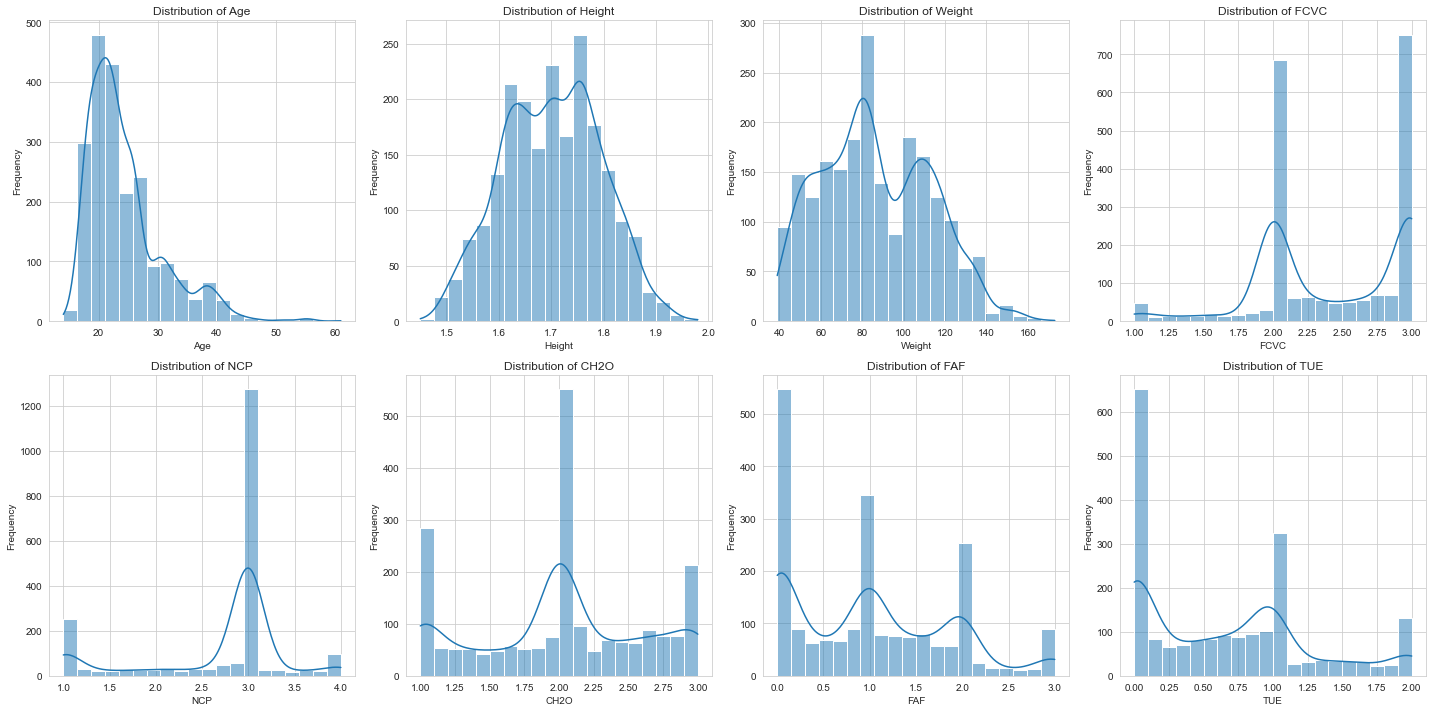

In [9]:
# Set the style for the plots
sns.set_style("whitegrid")

# Initialize the figure
plt.figure(figsize=(20, 10))

# Create subplots for each numerical variable
for i, col in enumerate(['Age', 'Height', 'Weight', 'FCVC','NCP', 'CH2O', 'FAF', 'TUE'], start=1):
    plt.subplot(2, 4, i)
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

**Box Plots to identify outliers and the spread of the numerical variables**

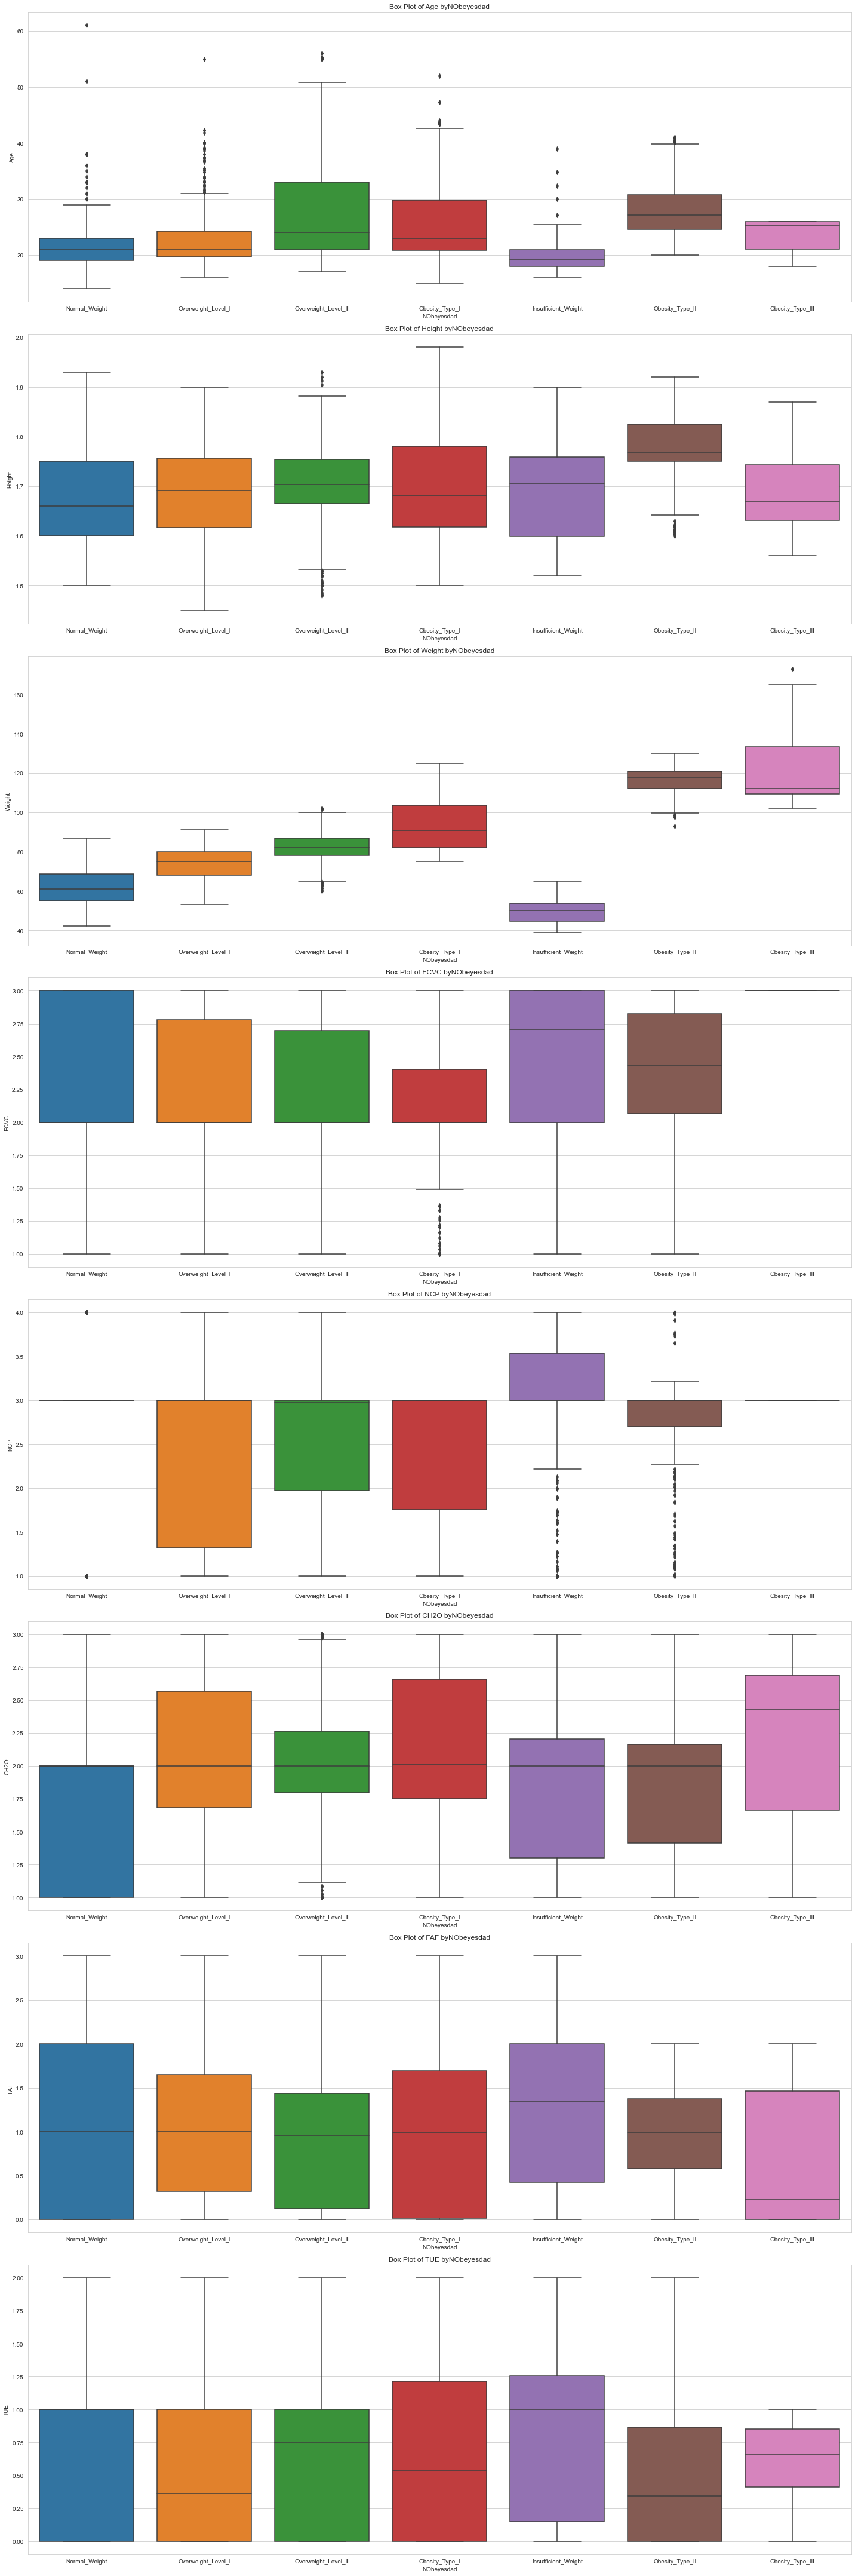

In [10]:
# Initialize the figure
plt.figure(figsize=(20, 60))

# Create subplots for each numerical variable
for i, col in enumerate(['Age', 'Height', 'Weight', 'FCVC','NCP', 'CH2O', 'FAF', 'TUE'], start=1):
    plt.subplot(8, 1, i)
    sns.boxplot(x='NObeyesdad', y=col, data=df)
    plt.title(f'Box Plot of {col} byNObeyesdad')
    plt.xlabel('NObeyesdad')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

**Dectection analytique des outliers**

In [11]:
# Fonction pour détecter les outliers
def detect_outliers(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

Outliers = {}

for elt in ['Age', 'Height', 'Weight', 'FCVC','NCP', 'CH2O', 'FAF', 'TUE']:
    # Exemple pour la variable "Weight"
    Outliers[elt] = detect_outliers(elt)

In [12]:
Outliers['Age'].shape
Outliers['Age'].describe(include='all')

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
count,168,168.000000,168.000000,168.000000,168,168,168.000000,168.000000,168,168,168.000000,168,168.000000,168.000000,168,168,168
unique,2,NaN,NaN,NaN,2,2,NaN,NaN,3,2,NaN,2,NaN,NaN,3,5,6
top,Female,NaN,NaN,NaN,yes,yes,NaN,NaN,Sometimes,no,NaN,no,NaN,NaN,Sometimes,Automobile,Obesity_Type_I
freq,101,NaN,NaN,NaN,154,151,NaN,NaN,155,163,NaN,166,NaN,NaN,94,156,70
mean,NaN,40.134586,1.660151,85.842314,NaN,NaN,2.340444,2.589662,NaN,NaN,1.880599,NaN,0.837684,0.222850,NaN,NaN,NaN
std,NaN,4.433645,0.094382,16.481505,NaN,NaN,0.386904,0.769990,NaN,NaN,0.615410,NaN,0.890442,0.416231,NaN,NaN,NaN
min,NaN,35.125401,1.500000,50.000000,NaN,NaN,2.000000,1.000000,NaN,NaN,1.000000,NaN,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,37.609522,1.567600,77.333090,NaN,NaN,2.000000,2.257633,NaN,NaN,1.404494,NaN,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,38.948074,1.669068,80.000000,NaN,NaN,2.148689,3.000000,NaN,NaN,1.913233,NaN,0.628626,0.000000,NaN,NaN,NaN
75%,NaN,40.978050,1.750000,96.733333,NaN,NaN,2.730700,3.000000,NaN,NaN,2.122109,NaN,1.459091,0.275831,NaN,NaN,NaN


In [13]:
df = df[df["Age"] <= 50]
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [14]:
Outliers['Height'].shape

(1, 17)

In [15]:
Outliers['Weight'].shape

(1, 17)

In [16]:
Outliers['FCVC'].shape

(0, 17)

In [17]:
Outliers['NCP'].shape

(579, 17)

In [18]:
Outliers['CH2O'].shape

(0, 17)

In [19]:
Outliers['FAF'].shape

(0, 17)

In [20]:
Outliers['TUE'].shape

(0, 17)

**Count Plot**

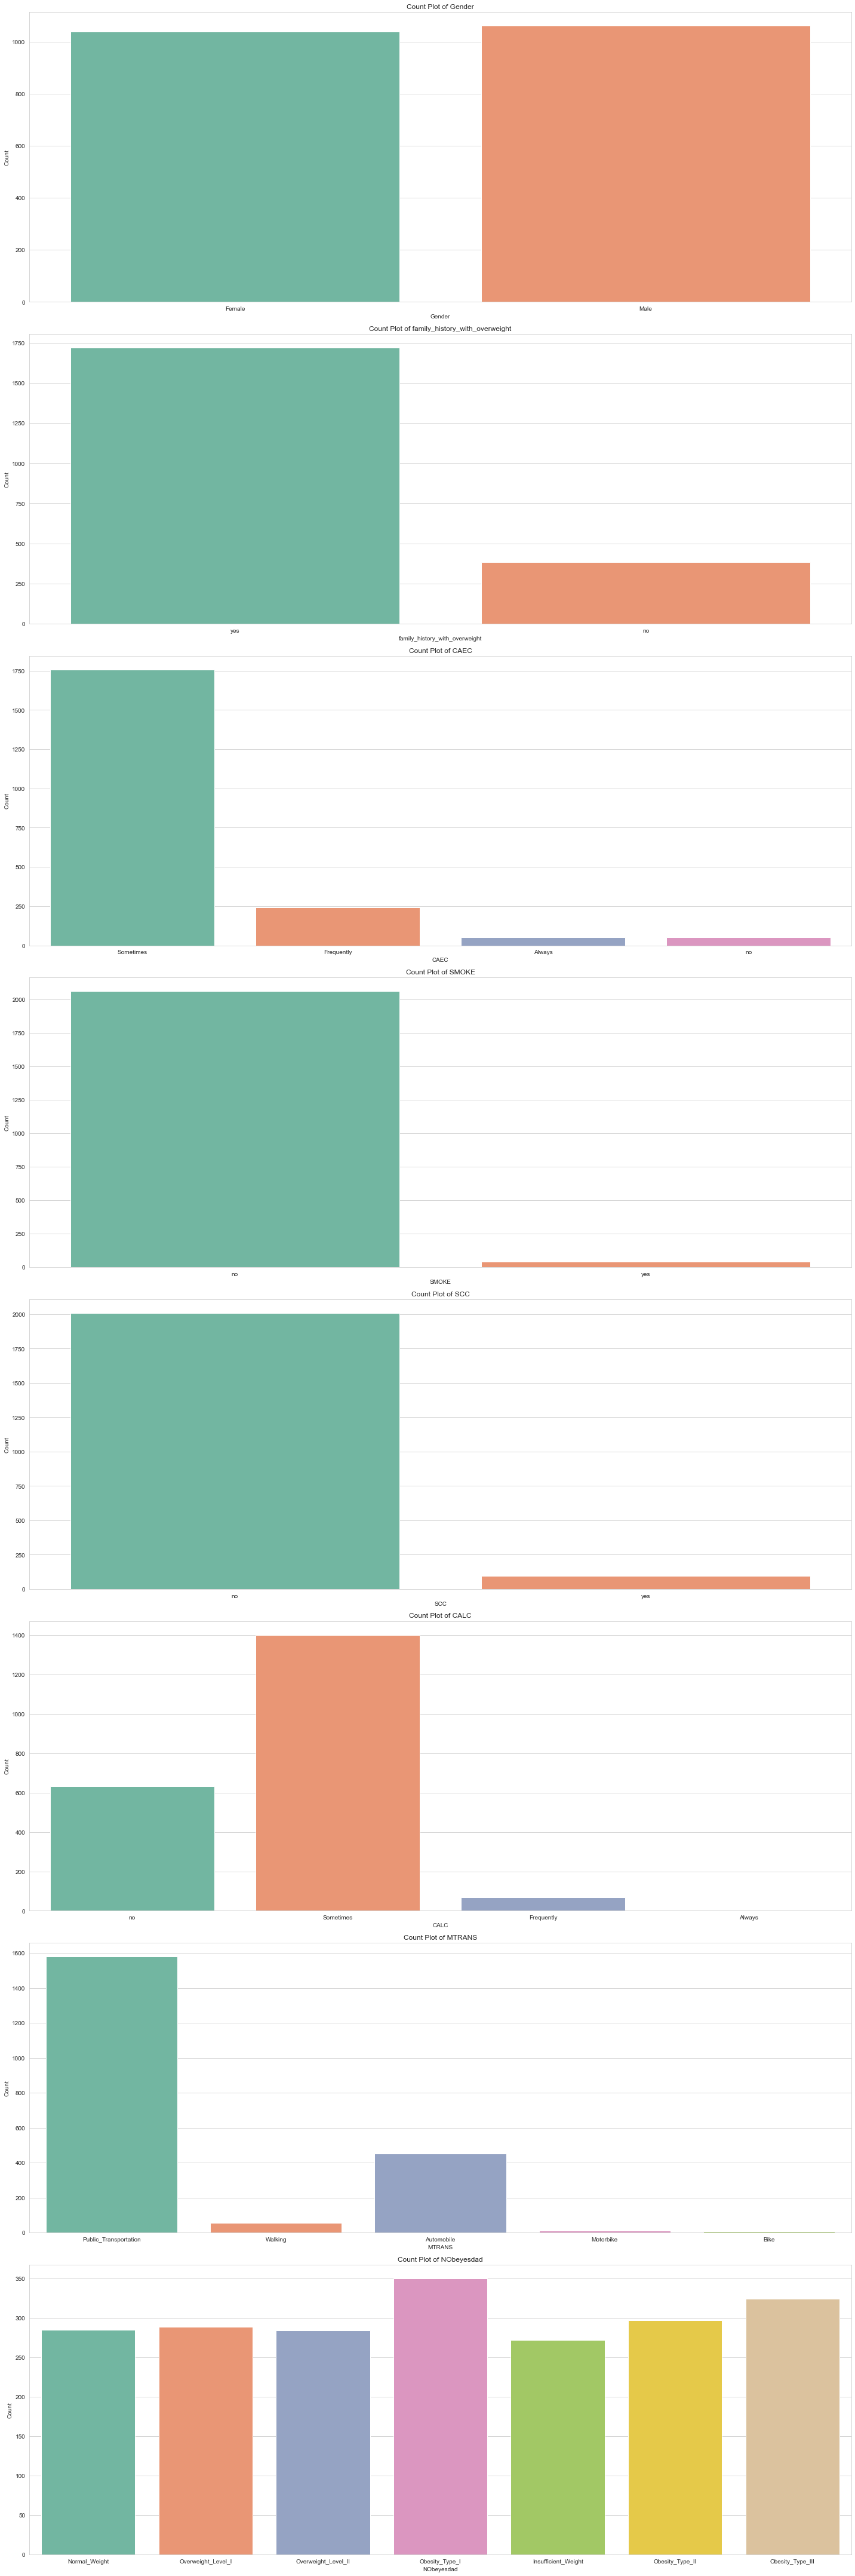

In [21]:
# Initialize the figure
plt.figure(figsize=(20, 60))

# Create subplots for each categorical variable
for i, col in enumerate(['Gender', 'family_history_with_overweight', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad'], start=1):
    plt.subplot(8, 1, i)
    sns.countplot(x=col, data=df, palette='Set2')
    plt.title(f'Count Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

**Label Encoding**

In [22]:
from sklearn.preprocessing import LabelEncoder

# Liste des colonnes catégorielles à encoder
categorical_columns = ['Gender', 'family_history_with_overweight', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad', 'FAVC']

# Dictionnaire pour stocker les correspondances
encoding_mappings = {}

# Appliquer Label Encoding et stocker les correspondances
for col in categorical_columns:
    le = LabelEncoder()
    df[f'{col}'] = le.fit_transform(df[col])
    encoding_mappings[col] = dict(zip(le.classes_, le.transform(le.classes_)))

# Afficher les correspondances
for col, mapping in encoding_mappings.items():
    print(f"Correspondance pour {col} : {mapping}")

Correspondance pour Gender : {'Female': 0, 'Male': 1}
Correspondance pour family_history_with_overweight : {'no': 0, 'yes': 1}
Correspondance pour CAEC : {'Always': 0, 'Frequently': 1, 'Sometimes': 2, 'no': 3}
Correspondance pour SMOKE : {'no': 0, 'yes': 1}
Correspondance pour SCC : {'no': 0, 'yes': 1}
Correspondance pour CALC : {'Always': 0, 'Frequently': 1, 'Sometimes': 2, 'no': 3}
Correspondance pour MTRANS : {'Automobile': 0, 'Bike': 1, 'Motorbike': 2, 'Public_Transportation': 3, 'Walking': 4}
Correspondance pour NObeyesdad : {'Insufficient_Weight': 0, 'Normal_Weight': 1, 'Obesity_Type_I': 2, 'Obesity_Type_II': 3, 'Obesity_Type_III': 4, 'Overweight_Level_I': 5, 'Overweight_Level_II': 6}
Correspondance pour FAVC : {'no': 0, 'yes': 1}


In [23]:
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.000000,1.620000,64.000000,1,0,2.0,3.0,2,0,2.000000,0,0.000000,1.000000,3,3,1
1,0,21.000000,1.520000,56.000000,1,0,3.0,3.0,2,1,3.000000,1,3.000000,0.000000,2,3,1
2,1,23.000000,1.800000,77.000000,1,0,2.0,3.0,2,0,2.000000,0,2.000000,1.000000,1,3,1
3,1,27.000000,1.800000,87.000000,0,0,3.0,3.0,2,0,2.000000,0,2.000000,0.000000,1,4,5
4,1,22.000000,1.780000,89.800000,0,0,2.0,1.0,2,0,2.000000,0,0.000000,0.000000,2,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1.710730,131.408528,1,1,3.0,3.0,2,0,1.728139,0,1.676269,0.906247,2,3,4
2107,0,21.982942,1.748584,133.742943,1,1,3.0,3.0,2,0,2.005130,0,1.341390,0.599270,2,3,4
2108,0,22.524036,1.752206,133.689352,1,1,3.0,3.0,2,0,2.054193,0,1.414209,0.646288,2,3,4
2109,0,24.361936,1.739450,133.346641,1,1,3.0,3.0,2,0,2.852339,0,1.139107,0.586035,2,3,4


**Correlation Matrice**

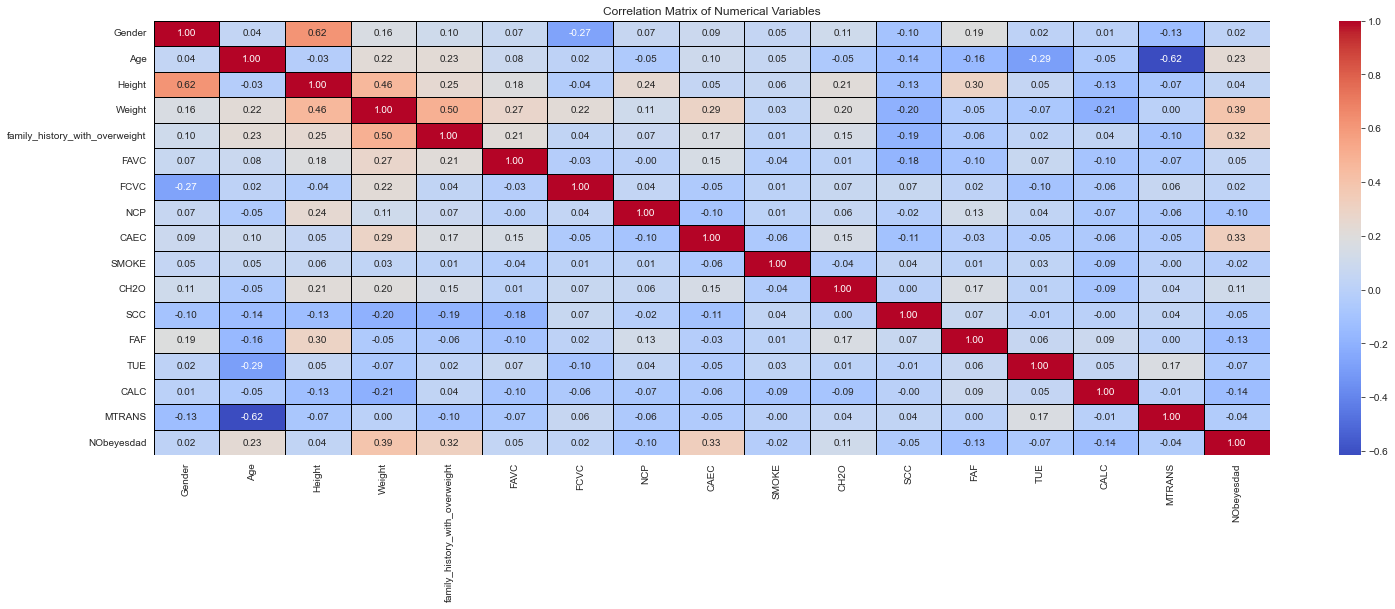

In [24]:
# Compute the correlation matrix for numerical variables
correlation_matrix = df.corr()

# Initialize the figure
plt.figure(figsize=(25, 8))

# Generate a heatmap to visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=1, linecolor='black')
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

**Suppression des variable susceptible de faire biaisé le résultat**

In [25]:
cols_to_drop = ['FAVC', 'FCVC', 'SMOKE', 'NCP', 'CH2O', 'SCC', 'TUE']
df = df.drop(columns=cols_to_drop)

In [26]:
df["BMI"] = df["Weight"] / (df["Height"] ** 2)

In [27]:
df.to_csv("..\Data\Data_for_trainning.csv", index=False)

**SMOTE**

In [28]:
colonnes = df.columns.tolist()

In [29]:
X = df.drop(['NObeyesdad'], axis=1)
y = df['NObeyesdad']

In [30]:
from imblearn.over_sampling import SMOTE
# Apply SMOTE to the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create a new DataFrame with resampled data
df_resampled = pd.concat([X_resampled, y_resampled], axis=1)

c:\Users\hp\Documents\__DO_NOT_MODIFY__\env_ml_courses\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [31]:
df_resampled.to_csv("..\Data\SMOTE_for_Data.csv", index=False)

Original Data:
            Gender          Age       Height       Weight  \
count  2101.000000  2101.000000  2101.000000  2101.000000   
mean      0.504998    24.168329     1.701688    86.626441   
std       0.500094     6.002497     0.093422    26.235729   
min       0.000000    14.000000     1.450000    39.000000   
25%       0.000000    19.920629     1.630000    65.363941   
50%       1.000000    22.754646     1.700627    83.000000   
75%       1.000000    26.000000     1.768435   107.947470   
max       1.000000    47.706100     1.980000   173.000000   

       family_history_with_overweight         CAEC          FAF         CALC  \
count                     2101.000000  2101.000000  2101.000000  2101.000000   
mean                         0.818182     1.860067     1.009422     2.267968   
std                          0.385786     0.467445     0.850948     0.512758   
min                          0.000000     0.000000     0.000000     0.000000   
25%                          1.0000

            Gender          Age       Height       Weight  \
count  2450.000000  2450.000000  2450.000000  2450.000000   
mean      0.502041    24.060110     1.701460    85.388004   
std       0.500098     5.968689     0.092631    26.356754   
min       0.000000    14.000000     1.450000    39.000000   
25%       0.000000    19.761415     1.630000    64.809544   
50%       1.000000    22.561208     1.701383    82.000000   
75%       1.000000    26.000000     1.766440   105.925210   
max       1.000000    47.706100     1.980000   173.000000   

       family_history_with_overweight         CAEC          FAF         CALC  \
count                     2450.000000  2450.000000  2450.000000  2450.000000   
mean                         0.797143     1.842041     1.013866     2.264490   
std                          0.402209     0.479838     0.842204     0.508246   
min                          0.000000     0.000000     0.000000     0.000000   
25%                          1.000000     2.000000

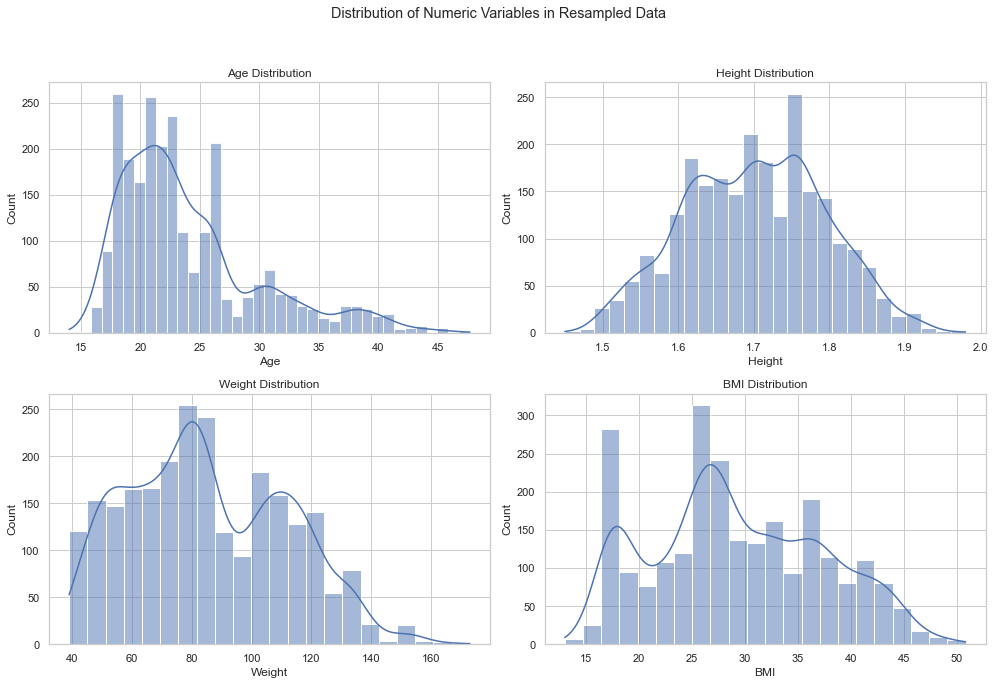

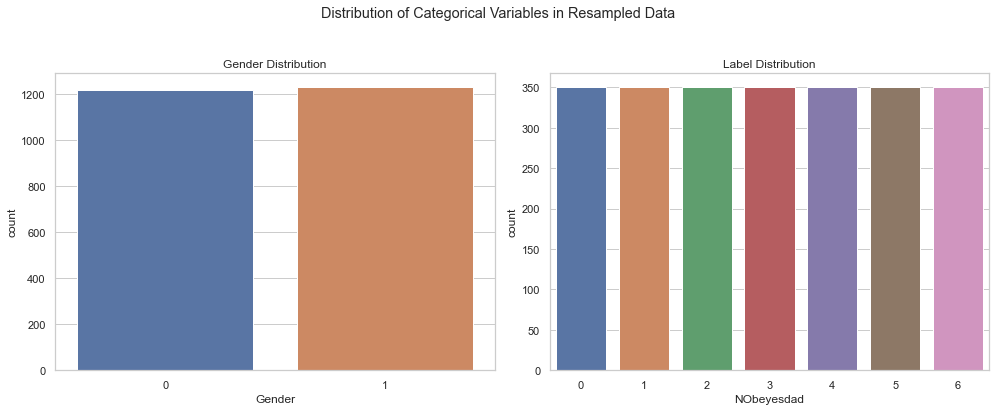

In [32]:
# Original DataFrame: df
# Balanced DataFrame after SMOTE: df_resampled

# Summary Statistics
print("Original Data:")
print(df.describe(include='all'))
print("\nResampled Data:")
print(df_resampled.describe(include='all'))

# Histogram for Numeric Variables
sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Distribution of Numeric Variables in Resampled Data')

sns.histplot(df_resampled['Age'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution')

sns.histplot(df_resampled['Height'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Height Distribution')

sns.histplot(df_resampled['Weight'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Weight Distribution')

sns.histplot(df_resampled['BMI'], kde=True, ax=axes[1, 1])
axes[1, 1].set_title('BMI Distribution')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Bar Plot for Categorical Variables
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Distribution of Categorical Variables in Resampled Data')

sns.countplot(data=df_resampled, x='Gender', ax=axes[0])
axes[0].set_title('Gender Distribution')

sns.countplot(data=df_resampled, x='NObeyesdad', ax=axes[1])
axes[1].set_title('Label Distribution')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

**Machine Learning Agorithms**

**Data Preprocessing**

In [33]:
X = df_resampled.drop(['NObeyesdad'], axis=1)
y = df_resampled['NObeyesdad']

**Normalisation des entrées**

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
# Splitting the data into training and testing sets (70% training and 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [38]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1715, 10), (735, 10), (1715,), (735,))

**Initialize an empty DataFrame to store evaluation metrics**

In [39]:
metrics_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC'])

**Logistic Regression**

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np

# Initialize the Logistic Regression model
logistic_model = LogisticRegression(random_state=42, multi_class='auto', solver='lbfgs')

# Fit the model to the training data
logistic_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_logistic = logistic_model.predict(X_test)

# Calculate probabilities for ROC-AUC score
y_prob_logistic = logistic_model.predict_proba(X_test)

# Initialize a dictionary to hold the evaluation metrics
metrics_dict = {
    'Model': ['Logistic Regression'],
    'Accuracy': [accuracy_score(y_test, y_pred_logistic)],
    'Precision': [precision_score(y_test, y_pred_logistic, average='weighted')],
    'Recall': [recall_score(y_test, y_pred_logistic, average='weighted')],
    'F1-Score': [f1_score(y_test, y_pred_logistic, average='weighted')],
    'AUC-ROC': [roc_auc_score(y_test, y_prob_logistic, multi_class='ovr', average='weighted')]
}

# Create a DataFrame to display the results
metrics_df = pd.DataFrame(metrics_dict)
metrics_df

c:\Users\hp\Documents\__DO_NOT_MODIFY__\env_ml_courses\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


,Model,Accuracy,Precision,Recall,F1-Score,AUC-ROC
0,Logistic Regression,0.921088,0.922211,0.921088,0.920599,0.992359


**Decision Tree Model Performance**

In [41]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Fit the model to the training data
decision_tree_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_decision_tree = decision_tree_model.predict(X_test)

# Calculate probabilities for ROC-AUC score
y_prob_decision_tree = decision_tree_model.predict_proba(X_test)

# Update the metrics dictionary
metrics_dict['Model'].append('Decision Tree')
metrics_dict['Accuracy'].append(accuracy_score(y_test, y_pred_decision_tree))
metrics_dict['Precision'].append(precision_score(y_test, y_pred_decision_tree, average='weighted'))
metrics_dict['Recall'].append(recall_score(y_test, y_pred_decision_tree, average='weighted'))
metrics_dict['F1-Score'].append(f1_score(y_test, y_pred_decision_tree, average='weighted'))
metrics_dict['AUC-ROC'].append(roc_auc_score(y_test, y_prob_decision_tree, multi_class='ovr', average='weighted'))

# Update the DataFrame to display the results
metrics_df = pd.DataFrame(metrics_dict)

metrics_df

,Model,Accuracy,Precision,Recall,F1-Score,AUC-ROC
0,Logistic Regression,0.921088,0.922211,0.921088,0.920599,0.992359
1,Decision Tree,0.983673,0.983960,0.983673,0.983708,0.990484


**Random Forest Model**

In [42]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
random_forest_model = RandomForestClassifier(random_state=42, n_estimators=100)

# Fit the model to the training data
random_forest_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_random_forest = random_forest_model.predict(X_test)

# Calculate probabilities for ROC-AUC score
y_prob_random_forest = random_forest_model.predict_proba(X_test)

# Update the metrics dictionary
metrics_dict['Model'].append('Random Forest')
metrics_dict['Accuracy'].append(accuracy_score(y_test, y_pred_random_forest))
metrics_dict['Precision'].append(precision_score(y_test, y_pred_random_forest, average='weighted'))
metrics_dict['Recall'].append(recall_score(y_test, y_pred_random_forest, average='weighted'))
metrics_dict['F1-Score'].append(f1_score(y_test, y_pred_random_forest, average='weighted'))
metrics_dict['AUC-ROC'].append(roc_auc_score(y_test, y_prob_random_forest, multi_class='ovr', average='weighted'))

# Update the DataFrame to display the results
metrics_df = pd.DataFrame(metrics_dict)

# Sort the DataFrame by AUC-ROC in descending order
metrics_df_sorted = metrics_df.sort_values(by='AUC-ROC', ascending=False)

metrics_df_sorted

,Model,Accuracy,Precision,Recall,F1-Score,AUC-ROC
2,Random Forest,0.990476,0.990784,0.990476,0.990487,0.999923
0,Logistic Regression,0.921088,0.922211,0.921088,0.920599,0.992359
1,Decision Tree,0.983673,0.983960,0.983673,0.983708,0.990484


**Support Vector Machines (SVM)**

In [43]:
from sklearn.svm import SVC
from sklearn.calibration import CalibratedClassifierCV

# Initialize the SVM model
svm_model = SVC(random_state=42, probability=True)

# Fit the model to the training data
svm_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_svm = svm_model.predict(X_test)

# Calculate probabilities for ROC-AUC score
y_prob_svm = svm_model.predict_proba(X_test)

# Update the metrics dictionary
metrics_dict['Model'].append('SVM')
metrics_dict['Accuracy'].append(accuracy_score(y_test, y_pred_svm))
metrics_dict['Precision'].append(precision_score(y_test, y_pred_svm, average='weighted'))
metrics_dict['Recall'].append(recall_score(y_test, y_pred_svm, average='weighted'))
metrics_dict['F1-Score'].append(f1_score(y_test, y_pred_svm, average='weighted'))
metrics_dict['AUC-ROC'].append(roc_auc_score(y_test, y_prob_svm, multi_class='ovr', average='weighted'))

# Update the DataFrame to display the results
metrics_df = pd.DataFrame(metrics_dict)

# Sort the DataFrame by AUC-ROC in descending order
metrics_df_sorted = metrics_df.sort_values(by='AUC-ROC', ascending=False)

metrics_df_sorted

,Model,Accuracy,Precision,Recall,F1-Score,AUC-ROC
2,Random Forest,0.990476,0.990784,0.990476,0.990487,0.999923
3,SVM,0.929252,0.931606,0.929252,0.929579,0.996188
0,Logistic Regression,0.921088,0.922211,0.921088,0.920599,0.992359
1,Decision Tree,0.983673,0.983960,0.983673,0.983708,0.990484


**k-Nearest Neighbors (k-NN)**

In [44]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the k-NN model
knn_model = KNeighborsClassifier(n_neighbors=5)

# Fit the model to the training data
knn_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_knn = knn_model.predict(X_test)

# Calculate probabilities for ROC-AUC score
y_prob_knn = knn_model.predict_proba(X_test)

# Update the metrics dictionary
metrics_dict['Model'].append('k-NN')
metrics_dict['Accuracy'].append(accuracy_score(y_test, y_pred_knn))
metrics_dict['Precision'].append(precision_score(y_test, y_pred_knn, average='weighted'))
metrics_dict['Recall'].append(recall_score(y_test, y_pred_knn, average='weighted'))
metrics_dict['F1-Score'].append(f1_score(y_test, y_pred_knn, average='weighted'))
metrics_dict['AUC-ROC'].append(roc_auc_score(y_test, y_prob_knn, multi_class='ovr', average='weighted'))

# Update the DataFrame to display the results
metrics_df = pd.DataFrame(metrics_dict)

# Sort the DataFrame by AUC-ROC in descending order
metrics_df_sorted = metrics_df.sort_values(by='AUC-ROC', ascending=False)

metrics_df_sorted

,Model,Accuracy,Precision,Recall,F1-Score,AUC-ROC
2,Random Forest,0.990476,0.990784,0.990476,0.990487,0.999923
3,SVM,0.929252,0.931606,0.929252,0.929579,0.996188
0,Logistic Regression,0.921088,0.922211,0.921088,0.920599,0.992359
1,Decision Tree,0.983673,0.983960,0.983673,0.983708,0.990484
4,k-NN,0.853061,0.849741,0.853061,0.849911,0.970411


**Naive Bayes**

In [45]:
from sklearn.naive_bayes import GaussianNB

# Initialize the Naive Bayes model
naive_bayes_model = GaussianNB()

# Fit the model to the training data
naive_bayes_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_naive_bayes = naive_bayes_model.predict(X_test)

# Calculate probabilities for ROC-AUC score
y_prob_naive_bayes = naive_bayes_model.predict_proba(X_test)

# Update the metrics dictionary
metrics_dict['Model'].append('Naive Bayes')
metrics_dict['Accuracy'].append(accuracy_score(y_test, y_pred_naive_bayes))
metrics_dict['Precision'].append(precision_score(y_test, y_pred_naive_bayes, average='weighted'))
metrics_dict['Recall'].append(recall_score(y_test, y_pred_naive_bayes, average='weighted'))
metrics_dict['F1-Score'].append(f1_score(y_test, y_pred_naive_bayes, average='weighted'))
metrics_dict['AUC-ROC'].append(roc_auc_score(y_test, y_prob_naive_bayes, multi_class='ovr', average='weighted'))

# Update the DataFrame to display the results
metrics_df = pd.DataFrame(metrics_dict)

# Sort the DataFrame by AUC-ROC in descending order
metrics_df_sorted = metrics_df.sort_values(by='AUC-ROC', ascending=False)

metrics_df_sorted

,Model,Accuracy,Precision,Recall,F1-Score,AUC-ROC
2,Random Forest,0.990476,0.990784,0.990476,0.990487,0.999923
3,SVM,0.929252,0.931606,0.929252,0.929579,0.996188
5,Naive Bayes,0.910204,0.913810,0.910204,0.908851,0.995641
0,Logistic Regression,0.921088,0.922211,0.921088,0.920599,0.992359
1,Decision Tree,0.983673,0.983960,0.983673,0.983708,0.990484
4,k-NN,0.853061,0.849741,0.853061,0.849911,0.970411


**Gradient Boosting**

In [46]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting model
gradient_boosting_model = GradientBoostingClassifier(random_state=42)

# Fit the model to the training data
gradient_boosting_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_gradient_boosting = gradient_boosting_model.predict(X_test)

# Calculate probabilities for ROC-AUC score
y_prob_gradient_boosting = gradient_boosting_model.predict_proba(X_test)

# Update the metrics dictionary
metrics_dict['Model'].append('Gradient Boosting')
metrics_dict['Accuracy'].append(accuracy_score(y_test, y_pred_gradient_boosting))
metrics_dict['Precision'].append(precision_score(y_test, y_pred_gradient_boosting, average='weighted'))
metrics_dict['Recall'].append(recall_score(y_test, y_pred_gradient_boosting, average='weighted'))
metrics_dict['F1-Score'].append(f1_score(y_test, y_pred_gradient_boosting, average='weighted'))
metrics_dict['AUC-ROC'].append(roc_auc_score(y_test, y_prob_gradient_boosting, multi_class='ovr', average='weighted'))

# Update the DataFrame to display the results
metrics_df = pd.DataFrame(metrics_dict)

# Sort the DataFrame by AUC-ROC in descending order
metrics_df_sorted = metrics_df.sort_values(by='AUC-ROC', ascending=False)

metrics_df_sorted

,Model,Accuracy,Precision,Recall,F1-Score,AUC-ROC
2,Random Forest,0.990476,0.990784,0.990476,0.990487,0.999923
6,Gradient Boosting,0.986395,0.986637,0.986395,0.986387,0.998856
3,SVM,0.929252,0.931606,0.929252,0.929579,0.996188
5,Naive Bayes,0.910204,0.913810,0.910204,0.908851,0.995641
0,Logistic Regression,0.921088,0.922211,0.921088,0.920599,0.992359
1,Decision Tree,0.983673,0.983960,0.983673,0.983708,0.990484
4,k-NN,0.853061,0.849741,0.853061,0.849911,0.970411


**XGBoost Classifier**

In [47]:
from xgboost import XGBClassifier

# Initialisation du modèle XGBoost
xgboost_model = XGBClassifier(eval_metric='mlogloss', use_label_encoder=False)

# Entraînement du modèle
xgboost_model.fit(X_train, y_train)

# Prédictions sur les données de test
y_pred_xgboost = xgboost_model.predict(X_test)

# Probabilités pour le calcul de l'AUC-ROC
y_prob_xgboost = xgboost_model.predict_proba(X_test)

# Mise à jour des métriques pour XGBoost
metrics_dict['Model'].append('XGBoost')
metrics_dict['Accuracy'].append(accuracy_score(y_test, y_pred_xgboost))
metrics_dict['Precision'].append(precision_score(y_test, y_pred_xgboost, average='weighted'))
metrics_dict['Recall'].append(recall_score(y_test, y_pred_xgboost, average='weighted'))
metrics_dict['F1-Score'].append(f1_score(y_test, y_pred_xgboost, average='weighted'))
metrics_dict['AUC-ROC'].append(roc_auc_score(y_test, y_prob_xgboost, multi_class='ovr', average='weighted'))

# Affichage des résultats
metrics_df = pd.DataFrame(metrics_dict)
metrics_df_sorted = metrics_df.sort_values(by='AUC-ROC', ascending=False)
metrics_df_sorted


c:\Users\hp\Documents\__DO_NOT_MODIFY__\env_ml_courses\lib\site-packages\xgboost\core.py:158: UserWarning: [19:34:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


,Model,Accuracy,Precision,Recall,F1-Score,AUC-ROC
2,Random Forest,0.990476,0.990784,0.990476,0.990487,0.999923
7,XGBoost,0.989116,0.989403,0.989116,0.989130,0.999092
6,Gradient Boosting,0.986395,0.986637,0.986395,0.986387,0.998856
3,SVM,0.929252,0.931606,0.929252,0.929579,0.996188
5,Naive Bayes,0.910204,0.913810,0.910204,0.908851,0.995641
0,Logistic Regression,0.921088,0.922211,0.921088,0.920599,0.992359
1,Decision Tree,0.983673,0.983960,0.983673,0.983708,0.990484
4,k-NN,0.853061,0.849741,0.853061,0.849911,0.970411


**LightGBM Classifier**

In [48]:
from lightgbm import LGBMClassifier

# Initialisation du modèle LightGBM
lightgbm_model = LGBMClassifier()

# Entraînement du modèle
lightgbm_model.fit(X_train, y_train)

# Prédictions sur les données de test
y_pred_lightgbm = lightgbm_model.predict(X_test)

# Probabilités pour le calcul de l'AUC-ROC
y_prob_lightgbm = lightgbm_model.predict_proba(X_test)

# Mise à jour des métriques pour LightGBM
metrics_dict['Model'].append('LightGBM')
metrics_dict['Accuracy'].append(accuracy_score(y_test, y_pred_lightgbm))
metrics_dict['Precision'].append(precision_score(y_test, y_pred_lightgbm, average='weighted'))
metrics_dict['Recall'].append(recall_score(y_test, y_pred_lightgbm, average='weighted'))
metrics_dict['F1-Score'].append(f1_score(y_test, y_pred_lightgbm, average='weighted'))
metrics_dict['AUC-ROC'].append(roc_auc_score(y_test, y_prob_lightgbm, multi_class='ovr', average='weighted'))

# Affichage des résultats
metrics_df = pd.DataFrame(metrics_dict)
metrics_df_sorted = metrics_df.sort_values(by='AUC-ROC', ascending=False)
metrics_df_sorted

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000664 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1296
[LightGBM] [Info] Number of data points in the train set: 1715, number of used features: 10
[LightGBM] [Info] Start training from score -1.950000
[LightGBM] [Info] Start training from score -1.974898
[LightGBM] [Info] Start training from score -1.921715
[LightGBM] [Info] Start training from score -1.937780
[LightGBM] [Info] Start training from score -2.022218
[LightGBM] [Info] Start training from score -1.933740
[LightGBM] [Info] Start training from score -1.886487
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with p

c:\Users\hp\Documents\__DO_NOT_MODIFY__\env_ml_courses\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\hp\Documents\__DO_NOT_MODIFY__\env_ml_courses\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


,Model,Accuracy,Precision,Recall,F1-Score,AUC-ROC
2,Random Forest,0.990476,0.990784,0.990476,0.990487,0.999923
8,LightGBM,0.986395,0.986850,0.986395,0.986432,0.999748
7,XGBoost,0.989116,0.989403,0.989116,0.989130,0.999092
6,Gradient Boosting,0.986395,0.986637,0.986395,0.986387,0.998856
3,SVM,0.929252,0.931606,0.929252,0.929579,0.996188
5,Naive Bayes,0.910204,0.913810,0.910204,0.908851,0.995641
0,Logistic Regression,0.921088,0.922211,0.921088,0.920599,0.992359
1,Decision Tree,0.983673,0.983960,0.983673,0.983708,0.990484
4,k-NN,0.853061,0.849741,0.853061,0.849911,0.970411


**CatBoost Classifier**

In [49]:
from catboost import CatBoostClassifier

# Initialisation du modèle CatBoost
catboost_model = CatBoostClassifier(silent=True)

# Entraînement du modèle
catboost_model.fit(X_train, y_train)

# Prédictions sur les données de test
y_pred_catboost = catboost_model.predict(X_test)

# Probabilités pour le calcul de l'AUC-ROC
y_prob_catboost = catboost_model.predict_proba(X_test)

# Mise à jour des métriques pour CatBoost
metrics_dict['Model'].append('CatBoost')
metrics_dict['Accuracy'].append(accuracy_score(y_test, y_pred_catboost))
metrics_dict['Precision'].append(precision_score(y_test, y_pred_catboost, average='weighted'))
metrics_dict['Recall'].append(recall_score(y_test, y_pred_catboost, average='weighted'))
metrics_dict['F1-Score'].append(f1_score(y_test, y_pred_catboost, average='weighted'))
metrics_dict['AUC-ROC'].append(roc_auc_score(y_test, y_prob_catboost, multi_class='ovr', average='weighted'))

# Affichage des résultats
metrics_df = pd.DataFrame(metrics_dict)
metrics_df_sorted = metrics_df.sort_values(by='AUC-ROC', ascending=False)
metrics_df_sorted

,Model,Accuracy,Precision,Recall,F1-Score,AUC-ROC
9,CatBoost,0.989116,0.989276,0.989116,0.989110,0.999924
2,Random Forest,0.990476,0.990784,0.990476,0.990487,0.999923
8,LightGBM,0.986395,0.986850,0.986395,0.986432,0.999748
7,XGBoost,0.989116,0.989403,0.989116,0.989130,0.999092
6,Gradient Boosting,0.986395,0.986637,0.986395,0.986387,0.998856
3,SVM,0.929252,0.931606,0.929252,0.929579,0.996188
5,Naive Bayes,0.910204,0.913810,0.910204,0.908851,0.995641
0,Logistic Regression,0.921088,0.922211,0.921088,0.920599,0.992359
1,Decision Tree,0.983673,0.983960,0.983673,0.983708,0.990484
4,k-NN,0.853061,0.849741,0.853061,0.849911,0.970411


**Optimization**
---

In [50]:
def optimize_memory(df):
    # Afficher la mémoire utilisée avant l'optimisation
    print(f"Memory usage before optimization: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
    
    # Pour chaque colonne du DataFrame, ajuster le type de données pour économiser de la mémoire
    for column in df.columns:
        col_type = df[column].dtype
        
        # Optimiser les colonnes numériques
        if np.issubdtype(col_type, np.number):
            # Si la colonne est de type float64, la convertir en float32 si possible
            if col_type == np.float64:
                df[column] = df[column].astype(np.float32)
            # Si la colonne est de type int64, la convertir en int32 ou int16 si possible
            elif col_type == np.int64:
                if df[column].min() >= np.iinfo(np.int32).min and df[column].max() <= np.iinfo(np.int32).max:
                    df[column] = df[column].astype(np.int32)
                elif df[column].min() >= np.iinfo(np.int16).min and df[column].max() <= np.iinfo(np.int16).max:
                    df[column] = df[column].astype(np.int16)
        
        # Optimiser les colonnes de type catégorie
        elif df[column].dtype == 'object':
            # Convertir les chaînes de caractères en catégorie si possible
            if df[column].nunique() / len(df[column]) < 0.5:
                df[column] = df[column].astype('category')
    
    # Afficher la mémoire utilisée après l'optimisation
    print(f"Memory usage after optimization: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
    
    return df


In [51]:
# Vérifier l'utilisation mémoire avant optimisation
print("Before Optimization:")
print(df_resampled.memory_usage(deep=True))

# Optimiser la mémoire
df_optimized = optimize_memory(df_resampled)

# Vérifier l'utilisation mémoire après optimisation
print("\nAfter Optimization:")
print(df_optimized.memory_usage(deep=True))


Before Optimization:
Index                               128
Gender                             9800
Age                               19600
Height                            19600
Weight                            19600
family_history_with_overweight     9800
CAEC                               9800
FAF                               19600
CALC                               9800
MTRANS                             9800
BMI                               19600
NObeyesdad                         9800
dtype: int64
Memory usage before optimization: 0.15 MB
Memory usage after optimization: 0.10 MB

After Optimization:
Index                              128
Gender                            9800
Age                               9800
Height                            9800
Weight                            9800
family_history_with_overweight    9800
CAEC                              9800
FAF                               9800
CALC                              9800
MTRANS                         

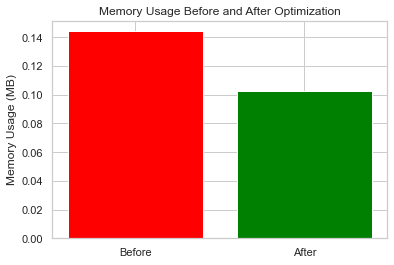

In [52]:
# Comparaison visuelle de la mémoire avant et après optimisation
memory_before = df.memory_usage(deep=True).sum() / 1024**2
memory_after = df_optimized.memory_usage(deep=True).sum() / 1024**2

# Création d'un graphique
plt.bar(['Before', 'After'], [memory_before, memory_after], color=['red', 'green'])
plt.ylabel('Memory Usage (MB)')
plt.title('Memory Usage Before and After Optimization')
plt.show()

In [53]:
import shap

In [54]:
import joblib

In [58]:
filename = '../Data/random_forest_model.sav'
joblib.dump(random_forest_model, filename)

['../Data/random_forest_model.sav']